# Packages

In [1]:
import numpy as np

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model

# 1. Making Sequential Model

### 1.1. Making with list of layers

In [2]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])

### 1.1. Adding layers one by one

In [3]:
model = keras.Sequential()
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))

#### 1.1.2. Setting Name of Layers

In [4]:
model = keras.Sequential(name="my_example_model")
model.add(layers.Dense(64, activation="relu", name="my_first_layer"))
model.add(layers.Dense(10, activation="softmax", name="my_last_layer"))
model.build((None, 3))
model.summary()

Model: "my_example_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ my_first_layer (Dense)          │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ my_last_layer (Dense)           │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 906 (3.54 KB)

 Trainable params: 906 (3.54 KB)

 Non-trainable params: 0 (0.00 B)

Setting size and number

In [5]:
vocabulary_size = 10000
num_tags = 100
num_departments = 4 

We have title data with vocabulary_size-dimensional vector, as we set vocabulary_size as 10000, we can denote

$$\mathbf{a}=\left(\begin{matrix}a_1\\a_2\\\vdots\\a_{10000}\end{matrix}\right)$$

In [6]:
title = keras.Input(shape=(vocabulary_size,), name="title")

Like previous, text_body with vocabulary_size-dimensional vector, as we set vocabulary_size as 10000, we can denote

$$\mathbf{b}=\left(\begin{matrix}b_1\\b_2\\\vdots\\b_{10000}\end{matrix}\right)$$

In [7]:
text_body = keras.Input(shape=(vocabulary_size,), name="text_body")

We have tag data with num_tags-dimensional vector, as we set num_tags as 100, we can denote

$$\mathbf{c}=\left(\begin{matrix}c_1\\c_2\\\vdots\\c_{100}\end{matrix}\right)$$

In [8]:
tags = keras.Input(shape=(num_tags,), name="tags")

We have 3 different input vector, title($\mathbf{a}_{10000\times1}$), text_body($\mathbf{b}_{10000\times1}$), tag($\mathbf{c}_{100\times1}$) and we can concatenate them in 1 vector

$$\mathbf{d}=\left(\begin{matrix}\mathbf{a}\\\mathbf{b}\\\mathbf{c}\\\end{matrix}\right)=\left(\begin{matrix}a_1\\a_2\\\vdots\\a_{10000}\\b_1\\b_2\\\vdots\\b_{10000}\\c_1\\c_2\\\vdots\\c_{100}\end{matrix}\right)$$

In [9]:
features = layers.Concatenate()([title, text_body, tags])

After concatenating 3 data, insert data into first layer with relu

In [10]:
features = layers.Dense(64, activation="relu")(features)

After passing hidden layer, we have to pass output layer, as we have 2 output, layer for output should be 2 layers. For first output, priority, it is singular value, so used sigmoid activation function

In [11]:
priority = layers.Dense(1, activation="sigmoid", name="priority")(features)

For department classification, as this is multi-class classification, we used softmax activation function which provides the probabilities about each departments

In [12]:
department = layers.Dense(num_departments, activation="softmax", name="department")(features)

Finally, make model with input and output

In [13]:
model = keras.Model(inputs=[title, text_body, tags], outputs=[priority, department])

In [14]:
num_samples = 1280

In [15]:
title_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
text_body_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
tags_data = np.random.randint(0, 2, size=(num_samples, num_tags))

In [16]:
priority_data = np.random.random(size=(num_samples, 1))
department_data = np.random.randint(0, 2, size=(num_samples, num_departments))

model.compile(optimizer="rmsprop",
              loss=["mean_squared_error", "categorical_crossentropy"],
              metrics=[["mean_absolute_error"], ["accuracy"]]) # we have two output, we nee two loss, 
model.fit([title_data, text_body_data, tags_data],
          [priority_data, department_data],
          epochs=1)
model.evaluate([title_data, text_body_data, tags_data],
               [priority_data, department_data])
priority_preds, department_preds = model.predict([title_data, text_body_data, tags_data])

40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - department_accuracy: 0.2752 - department_loss: 47.3521 - loss: 47.6610 - priority_loss: 0.3089 - priority_mean_absolute_error: 0.4785
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - department_accuracy: 0.1318 - department_loss: 55.4956 - loss: 55.8361 - priority_loss: 0.3405 - priority_mean_absolute_error: 0.5085
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


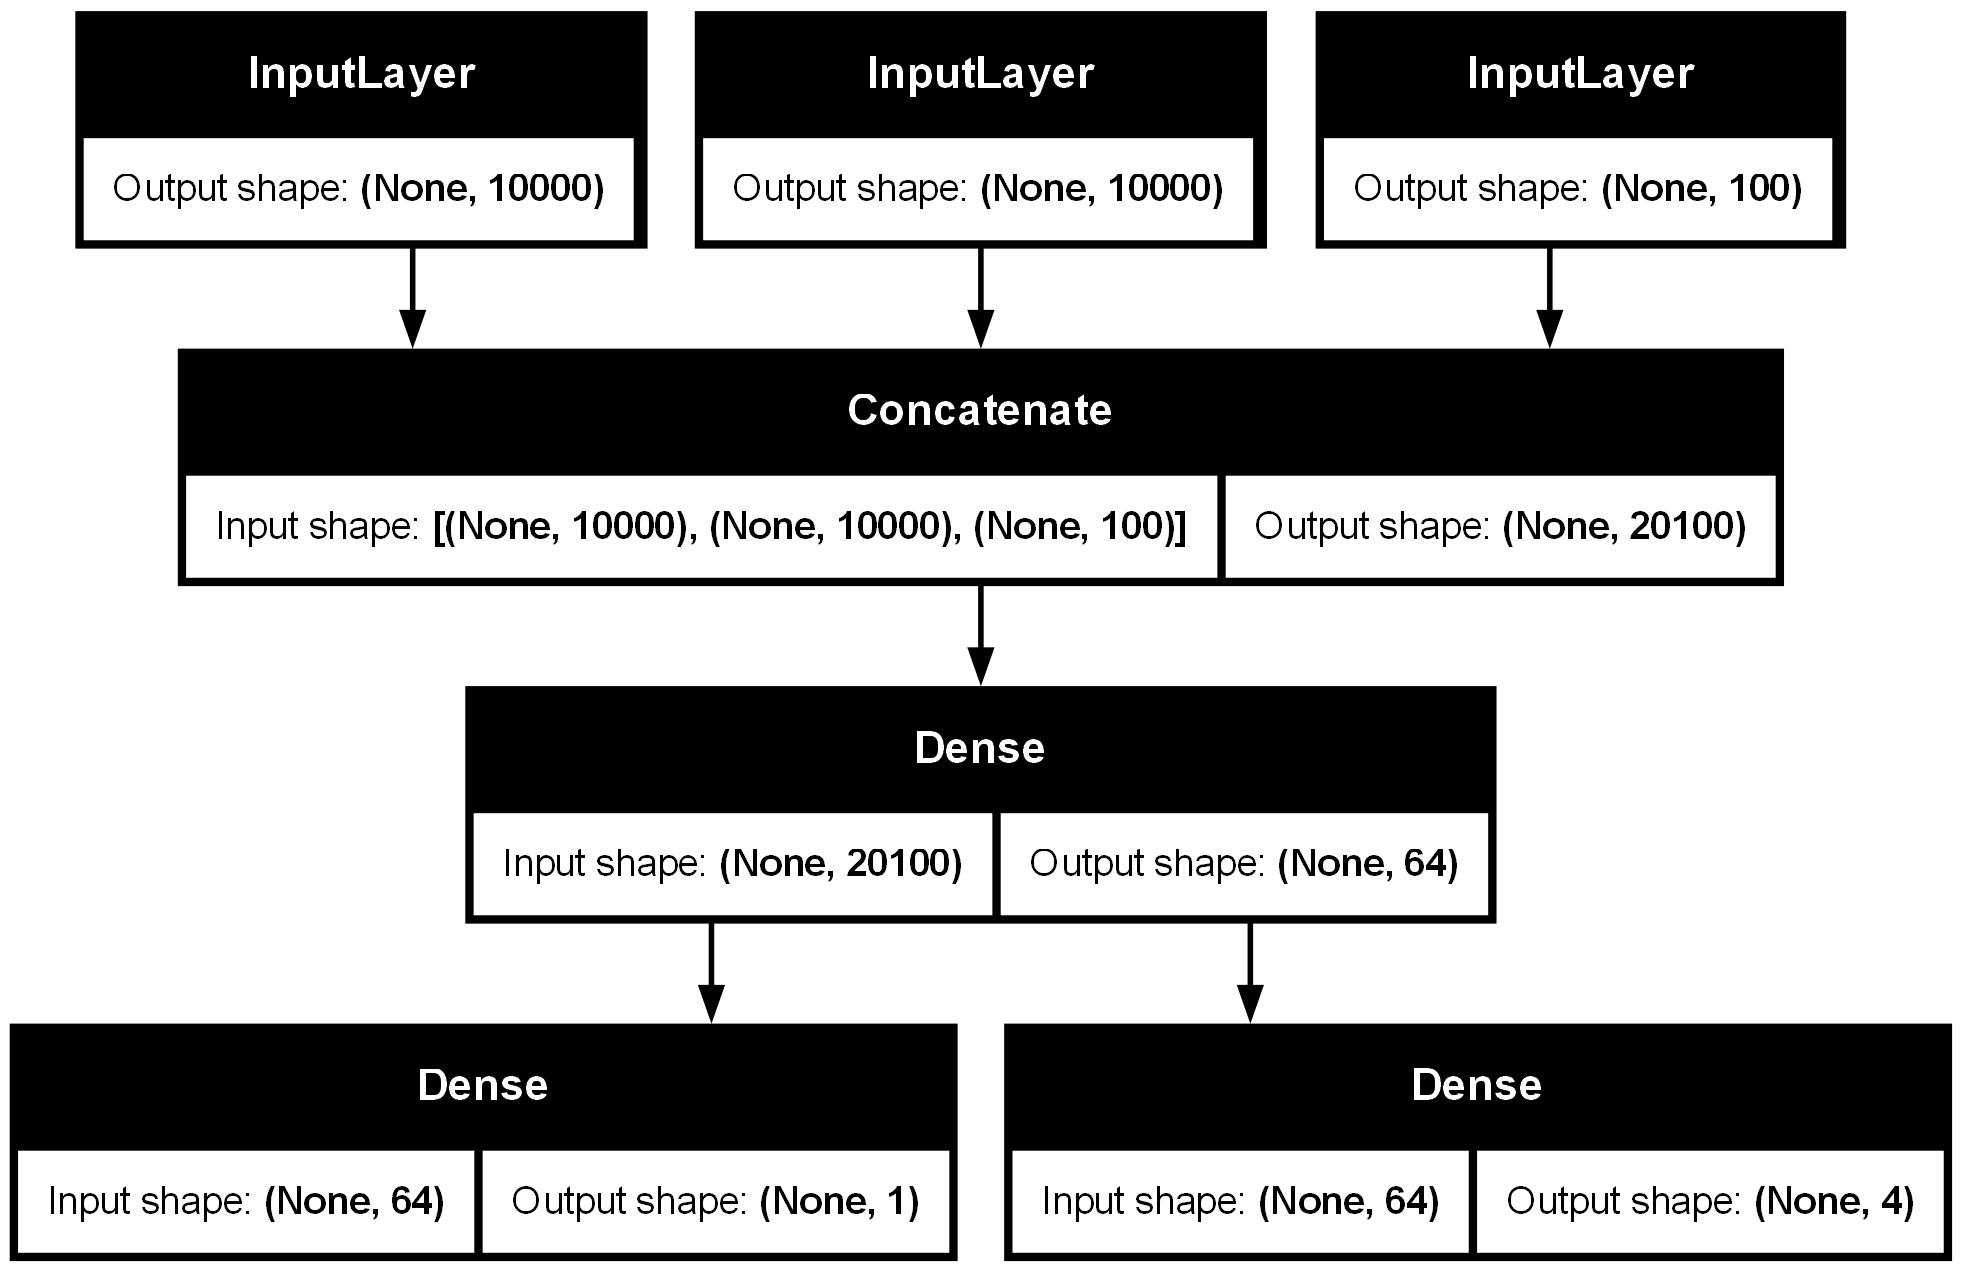

In [17]:
keras.utils.plot_model(model, "ticket_classifier_with_shape_info.png", show_shapes=True)

In [19]:
model.save("model.h5")

In [18]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ title (InputLayer)  │ (None, 10000)     │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ text_body           │ (None, 10000)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ tags (InputLayer)   │ (None, 100)       │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 20100)     │          0 │ title[0][0],      │
│ (Concatenate)       │                   │            │ text_body[0][0],  │
│                     │                   │            │ tags[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 64)        │  1,286,464 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ priority (Dense)    │ (None, 1)         │         65 │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ department (Dense)  │ (None, 4)         │        260 │ dense_4[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 2,573,580 (9.82 MB)

 Trainable params: 1,286,789 (4.91 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,286,791 (4.91 MB)